In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Linear Simples

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

In [2]:
#Importando base em R
tempodist = pd.read_csv(r'bases\tempodist.csv', sep=';')
tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [3]:
#Análise descritiva
tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


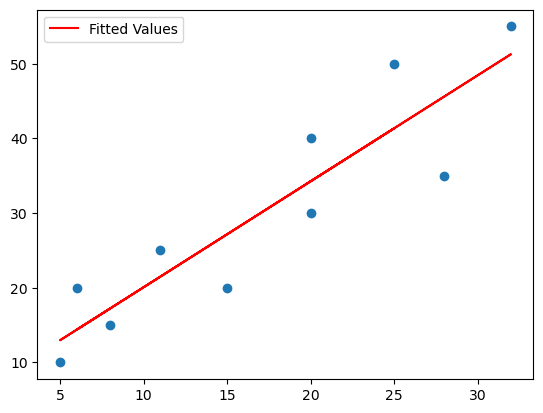

In [4]:
#Gráfico de dispersão
from scipy.stats import linregress

beta, intercept, r_value, p_value, std_err = linregress(tempodist['distancia'], tempodist['tempo'])
line = beta*np.array(tempodist['distancia']) + intercept

plt.scatter(tempodist['distancia'], tempodist['tempo'])
plt.plot(tempodist['distancia'], line, 'r', label='Fitted Values')
plt.xlabel=('Distância')
plt.ylabel=('Tempo')
plt.legend()
plt.show()

In [5]:
r_value**2

0.8194256756756756

# Modelagem de uma Regressão Linear Simples

In [6]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelo = sm.OLS.from_formula(formula = 'tempo~distancia', data=tempodist).fit()

In [7]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           0.000314
Time:                        15:22:45   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Incluindo os valores Y chapeu (yhat) e erros na base
tempodist['yhat'] = modelo.predict()
tempodist['erro'] = modelo.resid
tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


## R2

Indicador de Qualidade de Ajuste do modelo

É o quanto a variável explicativa consegue explicar do comportamento da variável dependente.<br>
Nos dá a ideia da dispersão da núvem de pontos em relação ao modelo.

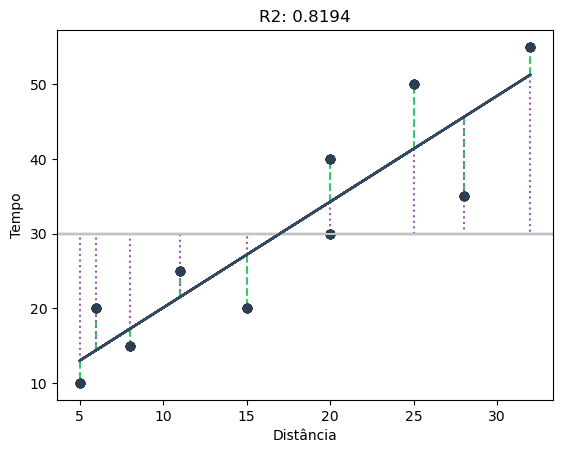

In [10]:
# Gráfico didático para visualizar o conceito de R²

y = tempodist['tempo']
yhat = tempodist['yhat']
x = tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Distância")
    plt.ylabel("Tempo")
plt.show()

In [9]:
# Cálculo do R2

r2 = (sum((tempodist['yhat'] - tempodist['tempo'].mean())**2))/((sum((tempodist['yhat'] - tempodist['tempo'].mean())**2)) + (sum((tempodist['erro'])**2)))
round(r2,4)

0.8194

## Coeficiente de Ajuste (R2)

Indica o quão disperso a nuvem de pontos está da reta prevista pelo modelo, ou seja, o quanto Y está próximo do Y hat (previsto)

In [10]:
# coeficiente de ajuste (R2) é a correlação ao quadrado
tempodist.iloc[:,:2].corr()

,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [11]:
tempodist.iloc[:,:2].corr()**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


### Exemplo para demosntrar quando R2 é 100%. <br>
Gerar a Y chapeu em função da distância.

In [12]:
modelo_auxiliar = sm.OLS.from_formula(formula='yhat~distancia', data=tempodist).fit()

In [13]:
modelo_auxiliar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.669e+31
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          2.36e-124
Time:                        19:37:40   Log-Likelihood:                 314.52
No. Observations:                  10   AIC:                            -625.0
Df Residuals:                       8   BIC:                            -624.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4e-15   1.47e+15      0.000       5.878       5.878
distancia      1.4189   2.08e-16   6.83e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                        9.461   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                1.523
Skew:                           0.058   Prob(JB):                        0.467
Kurtosis:                       1.092   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

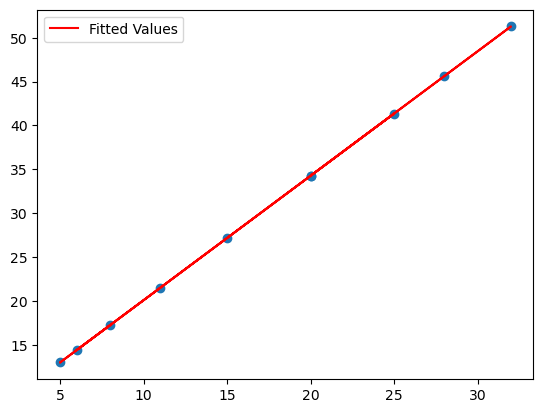

In [14]:
# Gráfico mostrando o perfect fit

beta, intercept, r_value, p_value, std_err = linregress(tempodist['distancia'], tempodist['yhat'])
line = beta*np.array(tempodist['distancia']) + intercept

plt.scatter(tempodist['distancia'], tempodist['yhat'])
plt.plot(tempodist['distancia'], line, 'r', label='Fitted Values')
plt.xlabel=('Distância')
plt.ylabel=('yhat')
plt.legend()
plt.show()

## Demonstrando Intervalos de Confiança no Modelo Original

<function matplotlib.pyplot.show(close=None, block=None)>

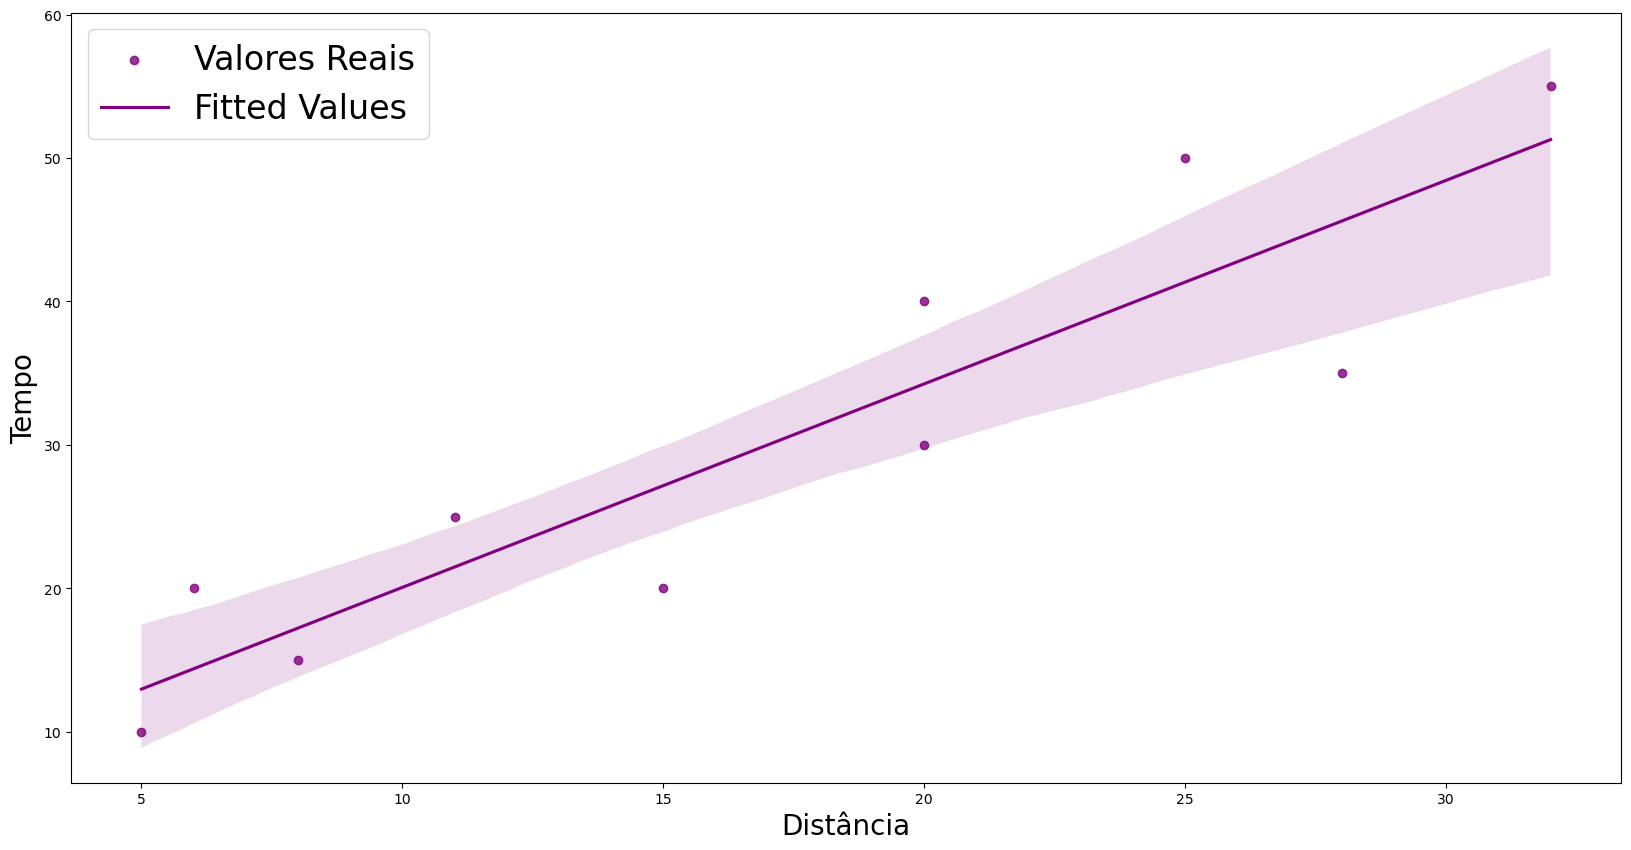

In [13]:
# Voltando ao nosso modelo original

#Plotando o intervalo de confiança de 90%
plt.figure(figsize=(20,10))
sns.regplot(data=tempodist, x='distancia', y='tempo', ci=90, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

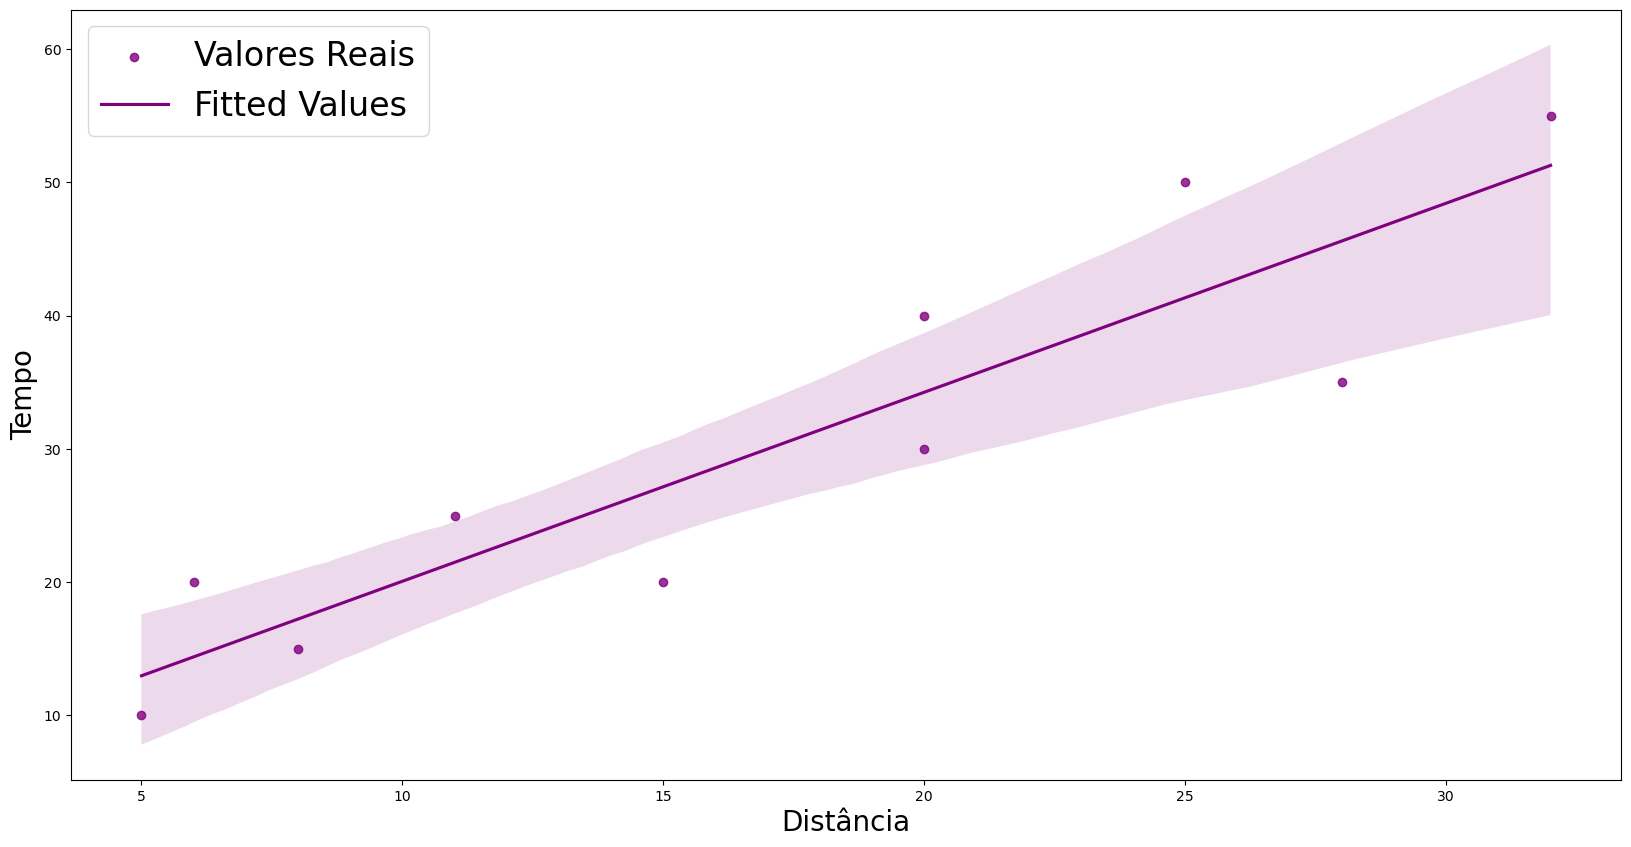

In [14]:
#Plotando o intervalo de confiança de 95%
plt.figure(figsize=(20,10))
sns.regplot(data=tempodist, x='distancia', y='tempo', ci=95, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

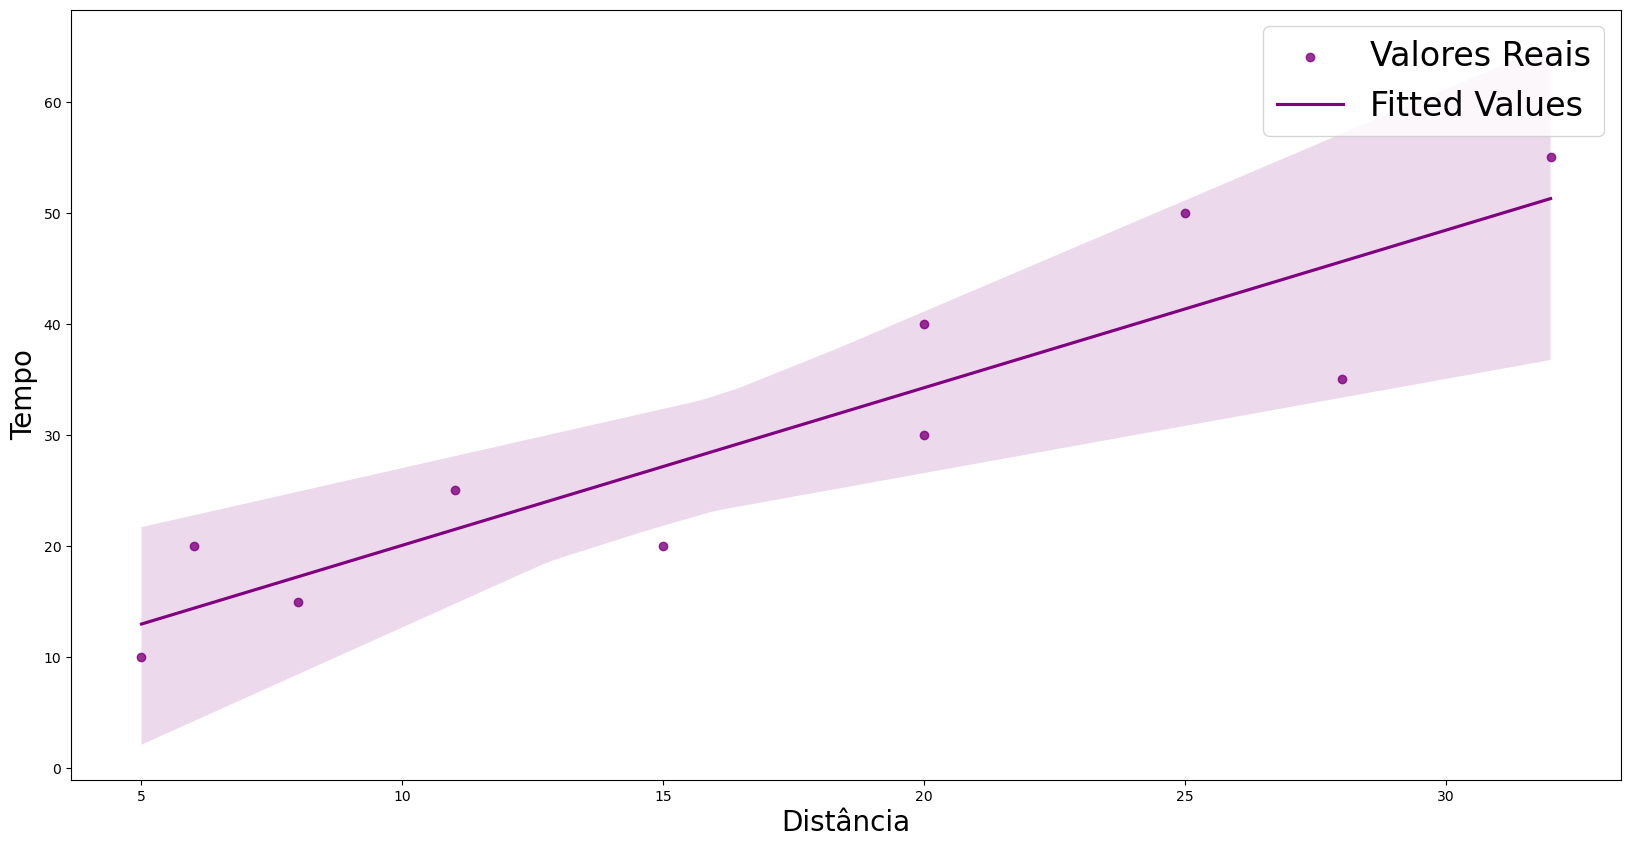

In [15]:
#Plotando o intervalo de confiança de 99,999%
plt.figure(figsize=(20,10))
sns.regplot(data=tempodist, x='distancia', y='tempo', ci=99.999, color='purple')
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [16]:
#Nível de significância de 10% / Nível de confiança de 90%
modelo.conf_int(alpha=0.1)

,0,1
Intercept,-2.549702,14.306459
distancia,0.981001,1.856837


# Significância Estatística do Modelo

O fato do R2 ser baixo, não significa que o modelo seja inviável. <br>
Significa que a capacidade preditiva do modelo é baixa mas ainda sim tem modelo<br>

<b>Teste F</b>

Verifica a significância global do modelo.

Caso o a prob (F-statistica) seja < 0,05 , rejeita H0.

> H0: Beta1, Beta2, Beta3, BetaK = 0
> H1: Pelo menos um Beta é diferente de 0


<b>Test t-student</b>

Analisa se cada um dos parâmetros, individualmente, é estatisticamente diferente de zero.

> H0: Beta = 0
> H1: beta diferente de 0

<b>
Nunca remover o alpha mesmo quando a P(t) for mair que 0,05. <br>
Alpha (intercept) com P(t) > 0,05 indica baixa quantidade de amostas <br></b>


In [28]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           0.000314
Time:                        20:26:59   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o ANOVA

Temos 1 variável X; <br>
Temos 2 parâmetros: alpha e beta; <br>
Podemos incluir mais 8 variáveis X para que o modelo seja estimável do ponto de vista economêtrico. <br>
Pois, como temos 10 observações, podemos ter no máximo 9 variáveis X.

In [22]:
# Referência: https://www.reneshbedre.com/blog/anova.html
from bioinfokit.analys import stat

# ANOVA da variável 'matematica'
res = stat()
res.anova_stat(df=tempodist, res_var='tempo', anova_model='tempo ~ distancia')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
distancia,1.0,1638.851351,1638.851351,36.303087,0.000314
Residual,8.0,361.148649,45.143581,NaN,NaN


In [25]:
#Cálculo da Estatística F

round((1638.851351/1)/(361.148649/8), 6)

36.303087